<a href="https://colab.research.google.com/github/M-AhmedRaza/Data_science_Bootcamp/blob/main/PlayStore_EDAl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Playstore Data (Large)
### Complete EDA Analysis

**About Dataset**\
Google PlayStore Android App Data. (18000 App Data)\


This data is from Google playstore that has all necessary columns to understand the How apps are doing on the platform.

**Content** The data was collected in the month of June 2021.

**What you can expect from Analysis:**

What is datset about

what is the aim of analysis

what you can expect

What & how will we do with the data- Analysis Story

Importing the data
Inspecting the data
Missing values and imputation
Data cleaning
EDA

---

# 00-Preliminaries

Importing Libraries\
Filtering warnings\
Setting display options\
Data Loading


## Importing Libraries

In [ ]:
#Base Libraries
import time
import datetime
import os
#technical libraries
import pandas as pd
import numpy as np
#visualization libraries
import seaborn as sns
import matplotlib.pyplot  as plt
#data processing libraries
from scipy import stats
#import date time
import datetime


#data analysis libraries
#machine learning libraries
#deep learning libraries
#nlp libraries





%matplotlib inline

In [ ]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# setting display options
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

---

## Data Loading

In [ ]:
df = pd.read_csv('/content/sample_data/Google-Playstore.csv')

---

# 01-Data Insight
This is the first step to get the intruduction of the data, what lies inside.

Features & Enteries information.

Data Types of each column.


In [ ]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


**Some of the columns that seems not very useful like: App id, Minimum & Maximum Installs, Free, Minimum Android, Developer Id, Developer website, Developer email, privacy policy, scraped time.\
we will make a subset of the the data with slected columns and drop the rest to perform analysis.**

In [ ]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,3561.000000,3.561000e+03,3.593000e+03,3.593000e+03,3593.000000
mean,2.144285,1.701534e+03,1.326698e+05,1.955325e+05,0.111336
std,2.108493,2.957055e+04,2.447519e+06,2.939831e+06,1.949123
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,5.000000e+01,7.600000e+01,0.000000
50%,2.700000,6.000000e+00,5.000000e+02,6.300000e+02,0.000000
75%,4.300000,3.900000e+01,5.000000e+03,6.435000e+03,0.000000
max,5.000000,1.264773e+06,1.000000e+08,1.254455e+08,99.990000


**This is the description of the data. It only includes the nuemerical data. However, we can observe there is more data which should be nuemerical but it is not yet. So we can address this issue.(Changing data type)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           3593 non-null   object 
 1   App Id             3593 non-null   object 
 2   Category           3593 non-null   object 
 3   Rating             3561 non-null   float64
 4   Rating Count       3561 non-null   float64
 5   Installs           3593 non-null   object 
 6   Minimum Installs   3593 non-null   int64  
 7   Maximum Installs   3593 non-null   int64  
 8   Free               3593 non-null   bool   
 9   Price              3593 non-null   float64
 10  Currency           3593 non-null   object 
 11  Size               3593 non-null   object 
 12  Minimum Android    3583 non-null   object 
 13  Developer Id       3593 non-null   object 
 14  Developer Website  2379 non-null   object 
 15  Developer Email    3593 non-null   object 
 16  Released           3485 

In [ ]:
#print no of rows and columns
print(f"No of rows in the dataset are {df.shape[0]} and no of columns in the dataset are {df.shape[1]}")

No of rows in the dataset are 3593 and no of columns in the dataset are 24


**No of rows in the dataset are 415,755 and no of columns in the dataset are 24**

In [ ]:
df['Category'].value_counts()

Education                  381
Music & Audio              263
Business                   224
Tools                      218
Books & Reference          200
Lifestyle                  196
Entertainment              193
Productivity               139
Personalization            126
Finance                    117
Shopping                   117
Food & Drink               115
Health & Fitness           115
Travel & Local             111
Sports                      93
Arcade                      77
Puzzle                      69
Casual                      64
News & Magazines            61
Communication               60
Social                      60
Photography                 58
Maps & Navigation           57
Medical                     47
Simulation                  38
Adventure                   38
Action                      33
Educational                 31
Art & Design                27
Auto & Vehicles             26
House & Home                26
Beauty                      22
Video Pl

**This is providing good insight what categories data belong to which will be pivotal for analysis. Music has two entries.\
Few of the categories are repeated with different name like Education hand Educational, music and music & audio.
Need to merge these two entries.**

---

# 02-Overall Observations from Data Introduction

This is the set of initial observations of the data, to keep the track which issues need to be addressed. There are 24 columns and 17917 rows.
Data is of multiple data types

**A quick overview of the data shows folowing are the issues that need to be addressed.**

1. Installs column  is datatype:object with +,NaN symbols and abbreviations
2. Price colmn $ sign and datatype:object
3. Minimum Android is object
4. Size Column is object with symbols
5. Ad supported is boolean
6. Dropping column
7. Changing case of column
8. **Size, Installs and Price** needs to be converted to nuemeric data type
9. Merging categories

**What we are going to do, Can be summarized as**

*   Adjusting data types
*   Changing case
*   Dropping columns
*   Merging categories
*   Removing symbols

**Data Cleaning and EDA Storyline**


1.   changing column names to snake case
2.   Dropping columns
3.   Removing symbols and Changing data types
4.   Merging categories
5.   Creating subset of only columns necessory for analysis








---

# 2.5 Data Cleaning

Column Names\
Slected columns\
Snake case column names


It is a good practice to start cleaning from the easiest issues.

In [ ]:
# converting all column names to snake case
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('-','_')
df.columns = df.columns.str.lower()
df.columns

Index(['app_name', 'app_id', 'category', 'rating', 'rating_count', 'installs',
       'minimum_installs', 'maximum_installs', 'free', 'price', 'currency',
       'size', 'minimum_android', 'developer_id', 'developer_website',
       'developer_email', 'released', 'last_updated', 'content_rating',
       'privacy_policy', 'ad_supported', 'in_app_purchases', 'editors_choice',
       'scraped_time'],
      dtype='object')

In [ ]:
# column names
column_names = df.columns
column_names


Index(['app_name', 'app_id', 'category', 'rating', 'rating_count', 'installs',
       'minimum_installs', 'maximum_installs', 'free', 'price', 'currency',
       'size', 'minimum_android', 'developer_id', 'developer_website',
       'developer_email', 'released', 'last_updated', 'content_rating',
       'privacy_policy', 'ad_supported', 'in_app_purchases', 'editors_choice',
       'scraped_time'],
      dtype='object')

In [ ]:
# creating subset from column names excluding App id, Minimum & Maximum Installs, Free, Minimum Android, Developer Id, Developer website, Developer email, privacy policy, scraped time
df_sel = df[column_names.difference(['app_id','minimum_installs','maximum_installs','free','minimum_android','developer_id','developer_website','developer_email','privacy_policy','scraped_time'])]
df_sel.head()

,ad_supported,app_name,category,content_rating,currency,editors_choice,in_app_purchases,installs,last_updated,price,rating,rating_count,released,size
0,False,Gakondo,Adventure,Everyone,USD,False,False,10+,"Feb 26, 2020",0.0,0.0,0.0,"Feb 26, 2020",10M
1,True,Ampere Battery Info,Tools,Everyone,USD,False,False,"5,000+","May 06, 2021",0.0,4.4,64.0,"May 21, 2020",2.9M
2,False,Vibook,Productivity,Everyone,USD,False,False,50+,"Aug 19, 2019",0.0,0.0,0.0,"Aug 9, 2019",3.7M
3,True,Smart City Trichy Public Service Vehicles 17UC...,Communication,Everyone,USD,False,False,10+,"Oct 13, 2018",0.0,5.0,5.0,"Sep 10, 2018",1.8M
4,False,GROW.me,Tools,Everyone,USD,False,False,100+,"Nov 12, 2018",0.0,0.0,0.0,"Feb 21, 2020",6.2M


In [ ]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ad_supported      3593 non-null   bool   
 1   app_name          3593 non-null   object 
 2   category          3593 non-null   object 
 3   content_rating    3593 non-null   object 
 4   currency          3593 non-null   object 
 5   editors_choice    3592 non-null   object 
 6   in_app_purchases  3593 non-null   bool   
 7   installs          3593 non-null   object 
 8   last_updated      3593 non-null   object 
 9   price             3593 non-null   float64
 10  rating            3561 non-null   float64
 11  rating_count      3561 non-null   float64
 12  released          3485 non-null   object 
 13  size              3593 non-null   object 
dtypes: bool(2), float64(3), object(9)
memory usage: 344.0+ KB


In [ ]:
#change relased to datetime
df_sel['released']=pd.to_datetime(df_sel['released'])


In [ ]:
df_sel['last_updated']=pd.to_datetime(df_sel['last_updated'])

In [ ]:
#check data type of released
df_sel['released'].dtype

dtype('<M8[ns]')

**Now we are dealing with only 15 columns.**

# 03-Null data
**This should be first and foremost operation to be performed.
as it is an important part of data cleaning, data analysis and machine learning.**

In [ ]:
df_sel.isnull().sum().sort_values(ascending=False)

released            108
rating               32
rating_count         32
editors_choice        1
ad_supported          0
app_name              0
category              0
content_rating        0
currency              0
in_app_purchases      0
installs              0
last_updated          0
price                 0
size                  0
dtype: int64

In [ ]:
null_perc=(df_sel.isnull().sum()/len(df_sel))*100
null_perc.sort_values(ascending=False)

released            3.005845
rating              0.890621
rating_count        0.890621
editors_choice      0.027832
ad_supported        0.000000
app_name            0.000000
category            0.000000
content_rating      0.000000
currency            0.000000
in_app_purchases    0.000000
installs            0.000000
last_updated        0.000000
price               0.000000
size                0.000000
dtype: float64

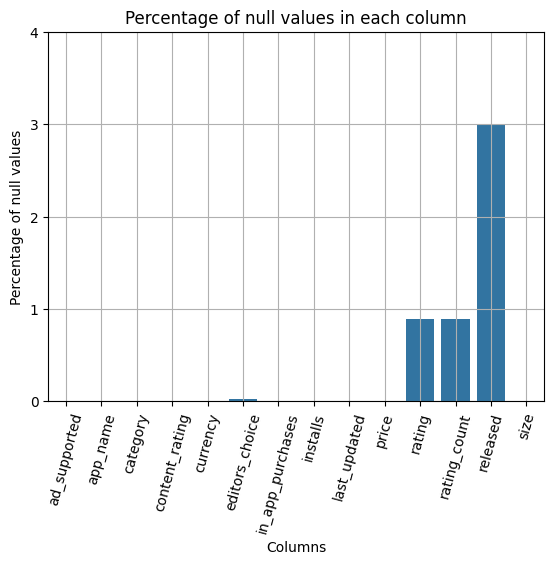

In [ ]:
#plot null values
sns.barplot(x=null_perc.index,y=null_perc)
#label x axis with -- degree rotation
plt.xticks(rotation=75);
plt.yticks(np.arange(0,5,1))
#label x axis
plt.xlabel('Columns')
#label y axis
plt.ylabel('Percentage of null values')
#title
plt.title('Percentage of null values in each column')
#add grid
plt.grid()
#show plot
plt.show()


**From Here we can see that there are 3 columns with siginificant null values i-e rating, rating_count and released.**

In [ ]:
#percentage of null values reporting
for column in df_sel:
  print(f" There are {(df_sel[column].isnull().sum()/len(df_sel[column]))*100:.3f} % null values in {column}" )


 There are 0.000 % null values in ad_supported
 There are 0.000 % null values in app_name
 There are 0.000 % null values in category
 There are 0.000 % null values in content_rating
 There are 0.000 % null values in currency
 There are 0.028 % null values in editors_choice
 There are 0.000 % null values in in_app_purchases
 There are 0.000 % null values in installs
 There are 0.000 % null values in last_updated
 There are 0.000 % null values in price
 There are 0.891 % null values in rating
 There are 0.891 % null values in rating_count
 There are 3.006 % null values in released
 There are 0.000 % null values in size


**Observations:**


*   Largest percentage of missing values is in realesed column (date & time type)
*   2nd largest percentage of missing values rating & rating count (numerical)



**Imputing Nulls**

In [ ]:
#release date
df_sel['released'].unique()

array(['2020-02-26T00:00:00.000000000', '2020-05-21T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', ...,
       '2013-08-27T00:00:00.000000000', '2014-12-12T00:00:00.000000000',
       '2019-07-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
#fillna with mean released
df_sel['released']=df_sel['released'].fillna(df_sel['released'].mean())


In [ ]:
df_sel['rating']=df['rating'].fillna(df['rating'].mean())
df_sel['rating_count']=df['rating_count'].fillna(df['rating_count'].mean())

In [ ]:
df_sel['rating_count'].isnull().sum()

0

In [ ]:
df_sel['rating'].isnull().sum()

0

In [ ]:
#fillna with mode of ad_supported, category, content_rating, currency, editor_choice, in_app_purchases, last_updated, price
df_sel['ad_supported']=df_sel['ad_supported'].fillna(df_sel['ad_supported'].mode()[0])
df_sel['category']=df_sel['category'].fillna(df_sel['category'].mode()[0])
df_sel['content_rating']=df_sel['content_rating'].fillna(df_sel['content_rating'].mode()[0])
df_sel['currency']=df_sel['currency'].fillna(df_sel['currency'].mode()[0])
df_sel['editors_choice']=df_sel['editors_choice'].fillna(df_sel['editors_choice'].mode()[0])
df_sel['in_app_purchases']=df_sel['in_app_purchases'].fillna(df_sel['in_app_purchases'].mode()[0])
df_sel['last_updated']=df_sel['last_updated'].fillna(df_sel['last_updated'].mode()[0])
df_sel['price']=df_sel['price'].fillna(df_sel['price'].mode()[0])


**we have imputed all the null values, at once using mode fuction because the null data was negligible <1% of total data and we dont want to drop the data.**

In [ ]:
df_sel.isnull().sum()

ad_supported        0
app_name            0
category            0
content_rating      0
currency            0
editors_choice      0
in_app_purchases    0
installs            0
last_updated        0
price               0
rating              0
rating_count        0
released            0
size                0
dtype: int64

**Now there is no null data in any column. So we are good to perform any anlysis**

---
---


# 04-Fixing issues with columns data


## Price Column

In [ ]:
df_sel['price'].unique()

array([ 0.  ,  1.99,  4.99,  0.99,  2.99,  3.49, 24.99,  4.49,  3.99,
       99.99,  1.49,  5.49,  2.49, 41.99,  6.49,  5.29, 19.99,  5.99,
        9.99])

In [ ]:
 df_sel['price'].sort_values(ascending=False).value_counts()

0.00     3516
0.99       21
1.99       13
3.99        9
4.99        6
2.99        5
2.49        5
5.49        3
4.49        2
9.99        2
3.49        2
1.49        2
6.49        1
5.99        1
5.29        1
41.99       1
19.99       1
24.99       1
99.99       1
Name: price, dtype: int64

**Out of 17,917 apps 17,548 apps are free. Therefore now look at apps with price**

<Axes: >

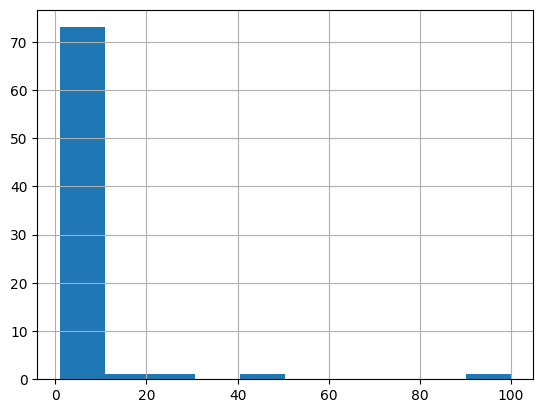

In [ ]:
# price greater than 0
filtered_df = df_sel[df_sel['price'] > 0]
#histogram of price
filtered_df['price'].hist()





Most of the price values are less than 43 $ only

In [ ]:
# null values in price
df_sel['price'].isnull().sum()

0

**we have to identify outliers in price, comback to this later**

## Installs
1. Symbols replacement
2. Changing Data Type to float
3. Removing Nulls Statistically
4. Binning

In [ ]:
df_sel['installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+'], dtype=object)

In [ ]:
df_sel['installs'].value_counts()

100+            704
1,000+          612
10+             480
10,000+         377
500+            302
50+             276
5,000+          212
100,000+        175
5+              119
50,000+         110
1+              105
1,000,000+       44
500,000+         38
5,000,000+       13
10,000,000+      12
0+               12
100,000,000+      2
Name: installs, dtype: int64

**Symbols of , and + needs to be removed.**

In [ ]:
#symbols replacement using labda function
df_sel['installs']=df_sel['installs'].apply(lambda x:x.replace("+","") if "+" in str(x) else x)
df_sel['installs']=df_sel['installs'].apply(lambda x:x.replace(",","") if "," in str(x) else x)



In [ ]:
df_sel['installs']=df_sel['installs'].apply(lambda x:float(x))

In [ ]:
#checking unique values without scientific notation
df_sel['installs'].unique().astype('int64')

array([       10,      5000,        50,       100,      1000,       500,
           50000,     10000,         1,    500000,    100000,         5,
        10000000,   1000000,   5000000,         0, 100000000])

In [ ]:
#confirming the changes
df_sel['installs'].value_counts()

100.0          704
1000.0         612
10.0           480
10000.0        377
500.0          302
50.0           276
5000.0         212
100000.0       175
5.0            119
50000.0        110
1.0            105
1000000.0       44
500000.0        38
5000000.0       13
10000000.0      12
0.0             12
100000000.0      2
Name: installs, dtype: int64

In [ ]:
df_sel['installs'].isnull().sum()

0

In [ ]:
#filling null values with mean
df_sel['installs']=df_sel['installs'].fillna(df_sel['installs'].mean())

In [ ]:
df_sel['installs'].isnull().sum()

0

**Observation: Now the desired changes are done successfully. we are good to perform statistical analysis.There is no null values in this column.**



```
Binning

It is complex to understand which app is installed the most by remebering the number of installs. So we will generalize it by binning.

Binning 'Installs' in to 8 Bins, to perform analysis fluently.

We wan to label no of installs to understand the data in a meaningful way.
```





In [ ]:
#Introducing new column of Installs_Category
df_sel['installs_bin']=df_sel['installs']
bins=[-10,10,100,1000,10000,100000,1000000,10000000,100000000]
labels=['Negligible','Very Low <100','Low <1000','Below Average <10k','Moderate <100k','High <1M','Very High <10M','Amazing <100M']
df_sel['installs_bin']=pd.cut(df_sel['installs'],bins=bins,labels=labels)
df_sel['installs_bin'].value_counts().sort_index()

Negligible            716
Very Low <100         980
Low <1000             914
Below Average <10k    589
Moderate <100k        285
High <1M               82
Very High <10M         25
Amazing <100M           2
Name: installs_bin, dtype: int64

In [ ]:
df_sel['installs'].isnull().sum()

0

In [ ]:
df_sel['installs_bin'].isnull().sum()

0

---

## Size Column

1. Removal of symbols +'',varies with device M k
2. Imputing Null Values
3. Changing data type
4. Coverting data into nuemeric million,thousand etc



In [ ]:
df_sel['size'].unique()

array(['10M', '2.9M', '3.7M', '1.8M', '6.2M', '46M', '2.5M', '16M',
       '1.3M', '3.5M', '51M', '2.7M', '7.6M', '15M', '29M', '12M', '2.0M',
       '70M', '11M', '24M', '1.4M', '20M', '2.4M', '25M', '21M', '36M',
       '6.1M', '2.6M', '8.9M', '3.9M', '30M', '26M', '4.9M', '4.3M',
       '4.8M', '4.6M', '2.8M', '38M', '5.1M', '147M', '33M', '2.2M',
       '7.1M', '27M', '18M', '7.7M', '32M', '19M', '39M', '31M', '1.2M',
       '3.1M', '3.2M', '42M', '22M', '4.1M', '50M', '5.5M', '127k',
       '8.4M', '41M', '49M', '7.0M', '4.7M', '43M', '5.4M', '3.0M',
       '1.6M', '2.1M', '37M', '3.6M', '9.0M', '9.9M', '67M', '28M',
       'Varies with device', '7.9M', '3.3M', '6.0M', '5.7M', '9.8M',
       '5.0M', '1.7M', '7.4M', '1.9M', '3.8M', '6.4M', '8.1M', '6.5M',
       '4.4M', '45M', '7.2M', '13M', '6.9M', '60M', '6.6M', '4.0M', '17M',
       '4.2M', '58M', '93M', '9.7M', '23M', '52M', '5.6M', '48M', '1.5M',
       '8.5M', '54M', '62M', '133M', '64M', '152M', '136M', '9.5M',
       '4.5M'

In [ ]:
df_sel['size'] = df_sel['size'].apply(lambda x: x.replace(",", "") if "," in str(x) else x)
df_sel['size'] = df_sel['size'].apply(lambda x: x.replace("Varies with device", "nan") if "Varies with device" in str(x) else x)
df_sel['size'] = df_sel['size'].apply(lambda x: x.replace("Varieswithdevice", "nan") if "Varieswithdevice" in str(x) else x)
#df_sel['size'] = df['Size'].apply(lambda x: x.replace(",", "") if "'" in str(x) else x)

In [ ]:
#checking unique values
df_sel['size'].unique()

array(['10M', '2.9M', '3.7M', '1.8M', '6.2M', '46M', '2.5M', '16M',
       '1.3M', '3.5M', '51M', '2.7M', '7.6M', '15M', '29M', '12M', '2.0M',
       '70M', '11M', '24M', '1.4M', '20M', '2.4M', '25M', '21M', '36M',
       '6.1M', '2.6M', '8.9M', '3.9M', '30M', '26M', '4.9M', '4.3M',
       '4.8M', '4.6M', '2.8M', '38M', '5.1M', '147M', '33M', '2.2M',
       '7.1M', '27M', '18M', '7.7M', '32M', '19M', '39M', '31M', '1.2M',
       '3.1M', '3.2M', '42M', '22M', '4.1M', '50M', '5.5M', '127k',
       '8.4M', '41M', '49M', '7.0M', '4.7M', '43M', '5.4M', '3.0M',
       '1.6M', '2.1M', '37M', '3.6M', '9.0M', '9.9M', '67M', '28M', 'nan',
       '7.9M', '3.3M', '6.0M', '5.7M', '9.8M', '5.0M', '1.7M', '7.4M',
       '1.9M', '3.8M', '6.4M', '8.1M', '6.5M', '4.4M', '45M', '7.2M',
       '13M', '6.9M', '60M', '6.6M', '4.0M', '17M', '4.2M', '58M', '93M',
       '9.7M', '23M', '52M', '5.6M', '48M', '1.5M', '8.5M', '54M', '62M',
       '133M', '64M', '152M', '136M', '9.5M', '4.5M', '40M', '531k',
     

In [ ]:
#converts a string representation of a file size to its corresponding numeric value in bytes
def convert_size(size):
  if isinstance(size,str) and size != '':
    if 'k' in size:
      return float(size.replace('k',''))*1024
    elif 'M' in size:
      return float(size.replace('M',''))*1024*1024
    elif 'G' in size:
      return float(size.replace('G',''))*1024*1024*1024
  return size


In [ ]:
df_sel['size']=df_sel['size'].apply(convert_size)
df_sel['size'].unique()

array([10485760.0, 3040870.4, 3879731.2, 1887436.8, 6501171.2, 48234496.0,
       2621440.0, 16777216.0, 1363148.8, 3670016.0, 53477376.0, 2831155.2,
       7969177.6, 15728640.0, 30408704.0, 12582912.0, 2097152.0,
       73400320.0, 11534336.0, 25165824.0, 1468006.4, 20971520.0,
       2516582.4, 26214400.0, 22020096.0, 37748736.0, 6396313.6,
       2726297.6, 9332326.4, 4089446.4, 31457280.0, 27262976.0, 5138022.4,
       4508876.8, 5033164.8, 4823449.6, 2936012.8, 39845888.0, 5347737.6,
       154140672.0, 34603008.0, 2306867.2, 7444889.6, 28311552.0,
       18874368.0, 8074035.2, 33554432.0, 19922944.0, 40894464.0,
       32505856.0, 1258291.2, 3250585.6, 3355443.2, 44040192.0,
       23068672.0, 4299161.6, 52428800.0, 5767168.0, 130048.0, 8808038.4,
       42991616.0, 51380224.0, 7340032.0, 4928307.2, 45088768.0,
       5662310.4, 3145728.0, 1677721.6, 2202009.6, 38797312.0, 3774873.6,
       9437184.0, 10380902.4, 70254592.0, 29360128.0, 'nan', 8283750.4,
       3460300.8, 629145

In [ ]:
#impute null values
size_null=df_sel['size'].isnull().sum()
print(f"There are ' {size_null} ' null values in Size Column")

There are ' 0 ' null values in Size Column


In [ ]:
df_sel['size'].value_counts()

nan            107
11534336.0      87
12582912.0      77
16777216.0      76
10485760.0      68
13631488.0      67
17825792.0      66
15728640.0      65
14680064.0      58
19922944.0      48
28311552.0      47
27262976.0      46
18874368.0      44
22020096.0      44
20971520.0      43
25165824.0      40
26214400.0      40
23068672.0      36
2936012.8       35
30408704.0      35
3774873.6       34
32505856.0      34
24117248.0      34
3984588.8       34
39845888.0      33
5662310.4       32
38797312.0      31
34603008.0      31
5138022.4       30
31457280.0      30
5872025.6       29
4299161.6       28
3670016.0       28
3355443.2       27
4823449.6       27
4718592.0       27
33554432.0      26
4089446.4       26
5033164.8       26
4404019.2       26
4928307.2       26
6291456.0       26
6501171.2       26
4508876.8       25
29360128.0      25
5557452.8       25
3460300.8       25
54525952.0      24
3040870.4       24
40894464.0      24
5976883.2       23
5242880.0       23
2621440.0   

**Data is in nuemeric form now.**

In [ ]:
#find value index of certain string
df[df_sel['size']==''].index

Int64Index([], dtype='int64')

In [ ]:
df_sel['size']=df_sel['size'].astype(float)

Missing Data Imputations

In [ ]:
df_sel['size'].isnull().sum()

107

In [ ]:
df_sel['size']=df_sel['size'].fillna(df_sel['size'].mean())

**Heatmap**

<Axes: >

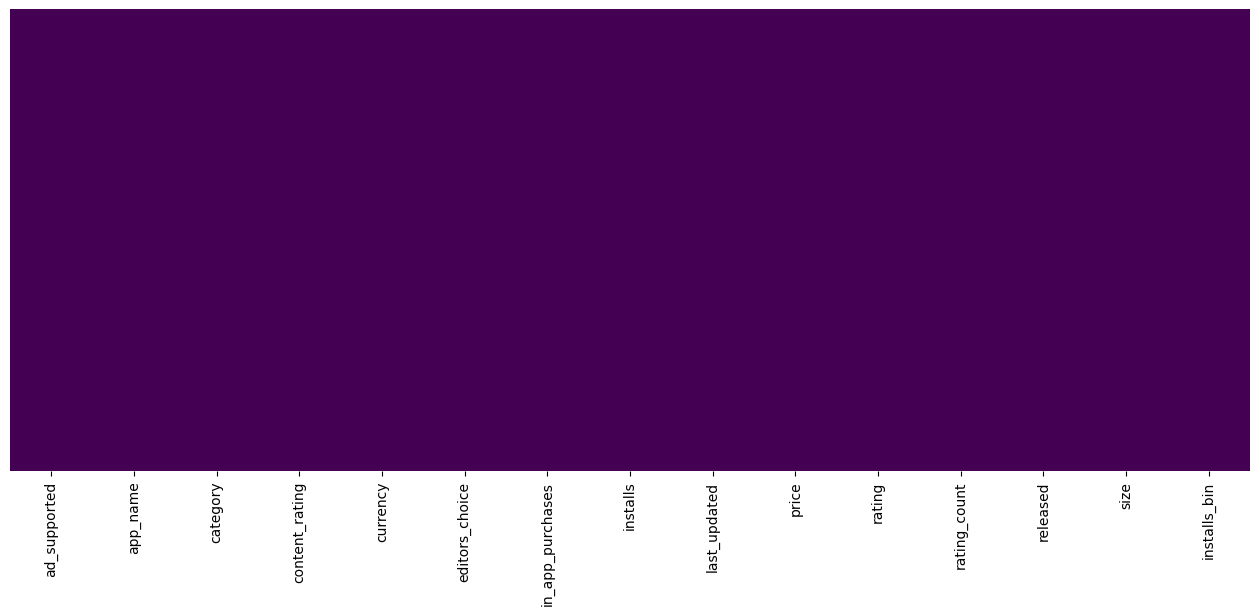

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df_sel.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Bar Plot**

Text(0.5, 1.0, ' Missing Values Percentage')

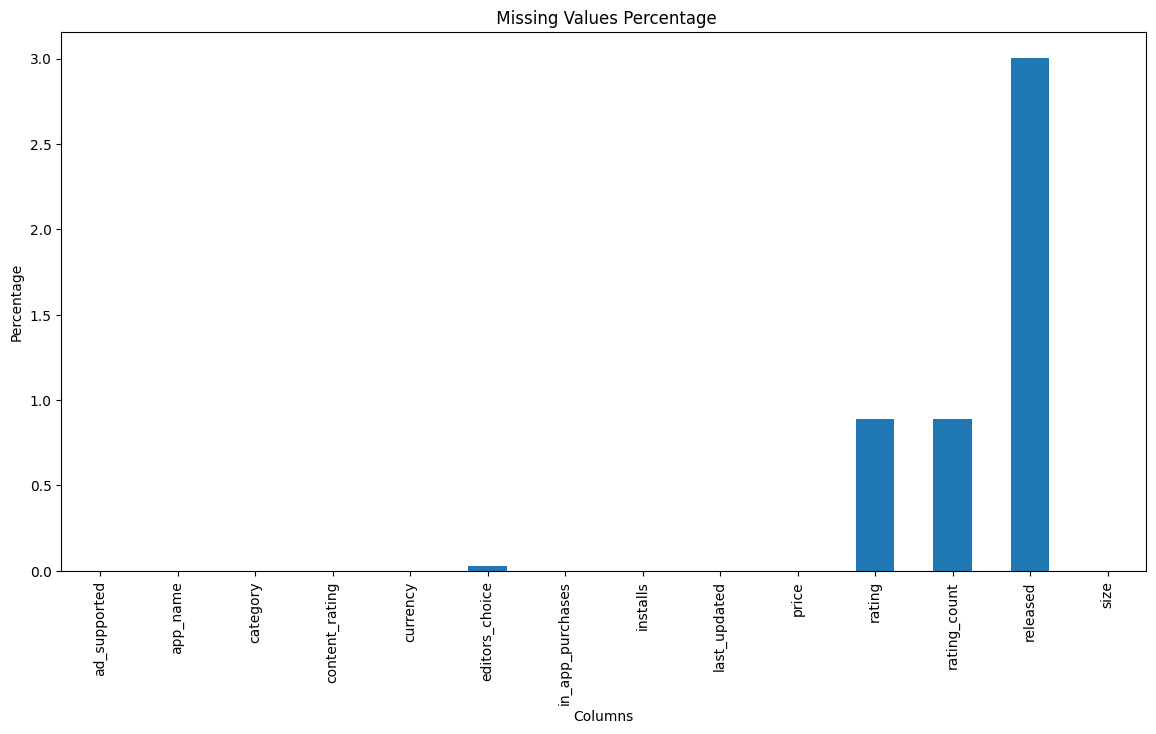

In [ ]:
plt.figure(figsize=(14,7))
null_perc.plot(kind='bar')

plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title(' Missing Values Percentage')

Text(0.5, 1.0, ' Missing Values Percentage')

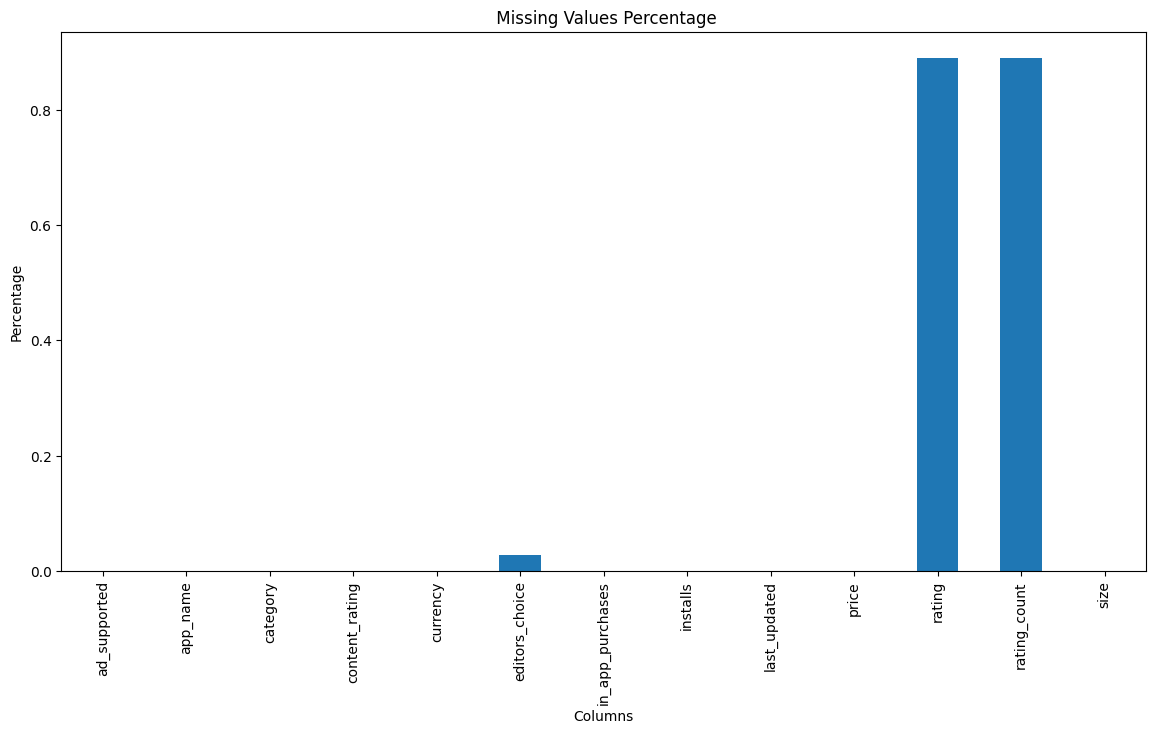

In [ ]:
#with filter of <1%
plt.figure(figsize=(14,7))
null_perc[null_perc<1].plot(kind='bar')

plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title(' Missing Values Percentage')

Now we have 3 more columns in data describe, due to change in data type

In [ ]:
size_null=df_sel['size'].isnull().sum()
print(f"There are ' {size_null} ' null values in Size Column now")

There are ' 0 ' null values in Size Column now


**Size Column is ready.
Symbols are removed.
Data type is float now.
Now we can perform statistical analysis.**

---

---

# 05-Descriptive Statistics
Performing statistical analysis on the data.

In [ ]:
df_sel.head()

,ad_supported,app_name,category,content_rating,currency,editors_choice,in_app_purchases,installs,last_updated,price,rating,rating_count,released,size,installs_bin
0,False,Gakondo,Adventure,Everyone,USD,False,False,10.0,2020-02-26,0.0,0.0,0.0,2020-02-26,10485760.0,Negligible
1,True,Ampere Battery Info,Tools,Everyone,USD,False,False,5000.0,2021-05-06,0.0,4.4,64.0,2020-05-21,3040870.4,Below Average <10k
2,False,Vibook,Productivity,Everyone,USD,False,False,50.0,2019-08-19,0.0,0.0,0.0,2019-08-09,3879731.2,Very Low <100
3,True,Smart City Trichy Public Service Vehicles 17UC...,Communication,Everyone,USD,False,False,10.0,2018-10-13,0.0,5.0,5.0,2018-09-10,1887436.8,Negligible
4,False,GROW.me,Tools,Everyone,USD,False,False,100.0,2018-11-12,0.0,0.0,0.0,2020-02-21,6501171.2,Very Low <100


In [ ]:
df_sel.describe()

,installs,price,rating,rating_count,size
count,3.593000e+03,3593.000000,3593.000000,3.593000e+03,3.593000e+03
mean,1.326698e+05,0.111336,2.144285,1.701534e+03,1.930787e+07
std,2.447519e+06,1.949123,2.099080,2.943854e+04,2.393086e+07
min,0.000000e+00,0.000000,0.000000,0.000000e+00,1.843200e+04
25%,5.000000e+01,0.000000,0.000000,0.000000e+00,5.138022e+06
50%,5.000000e+02,0.000000,2.600000,6.000000e+00,1.048576e+07
75%,5.000000e+03,0.000000,4.300000,4.100000e+01,2.516582e+07
max,1.000000e+08,99.990000,5.000000,1.264773e+06,5.567939e+08


In [ ]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ad_supported      3593 non-null   bool          
 1   app_name          3593 non-null   object        
 2   category          3593 non-null   object        
 3   content_rating    3593 non-null   object        
 4   currency          3593 non-null   object        
 5   editors_choice    3593 non-null   bool          
 6   in_app_purchases  3593 non-null   bool          
 7   installs          3593 non-null   float64       
 8   last_updated      3593 non-null   datetime64[ns]
 9   price             3593 non-null   float64       
 10  rating            3593 non-null   float64       
 11  rating_count      3593 non-null   float64       
 12  released          3593 non-null   datetime64[ns]
 13  size              3593 non-null   float64       
 14  installs_bin      3593 n

# **Exploring Distributions**

only for nuemeric columns.

** lets scale the data **

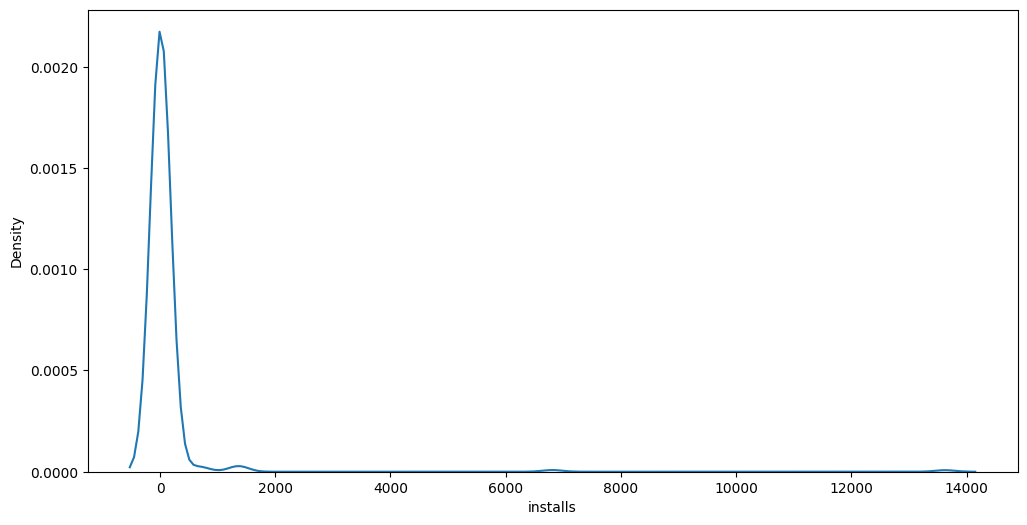

In [ ]:
#calculate zscore of installs
from scipy import stats
#calulate z score
median = np.median(df_sel['installs'])
median_absolute_deviation = np.median(np.abs(df_sel['installs'] - median))
modified_z_scores = 0.6745 * (df_sel['installs'] - median) / median_absolute_deviation
#plot modified z scores
plt.figure(figsize=(12,6))
sns.kdeplot(modified_z_scores)
plt.show()



In [ ]:
#show count of values in installs greater than 100000
drop_ins=df_sel['installs'][df_sel['installs']>10000000].count()
#drop drop_ins from installs
df_sel.drop(df_sel[df_sel['installs']>10000000].index,inplace=True)

**we have removed ' {drop_ins} ' values from installs greater than 10,000,000**

In [ ]:
#drop column installs_mm
df_sel.drop('installs_mm',axis=1,inplace=True)

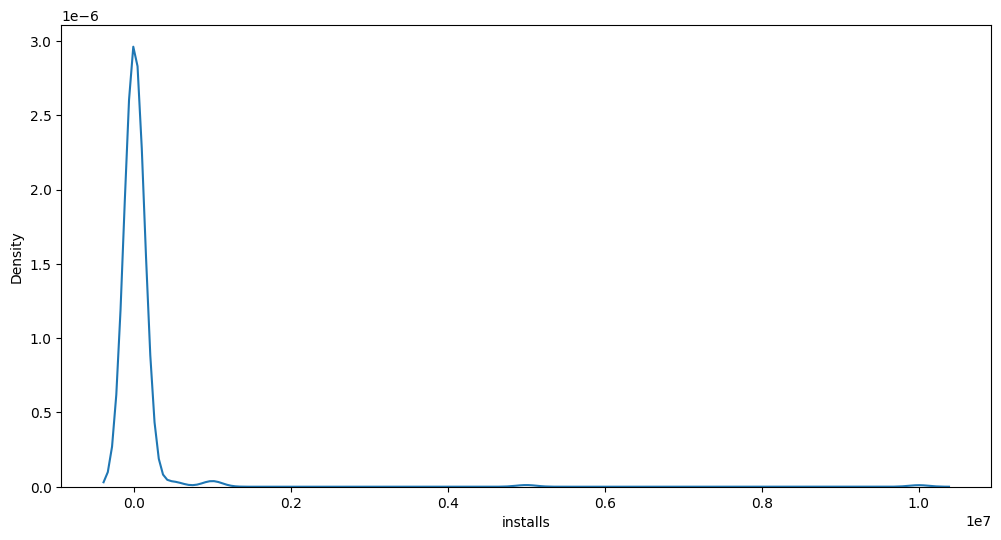

In [ ]:
#create kernel density estimation plot
plt.figure(figsize=(12,6))
#df_sel['installs'].plot(kind='kde')
#creat KDE plot in a range
sns.kdeplot(data=df_sel['installs'])
#setting limit to view more
#plt.xlim(-1000000, 1000000)
plt.show()




<Axes: ylabel='installs'>

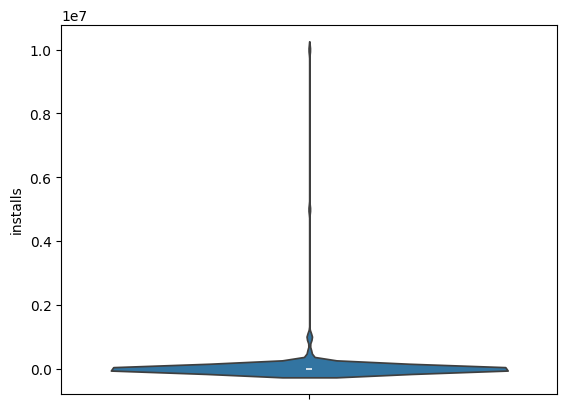

In [ ]:
#creating violin plot
sns.violinplot(data=df_sel, y='installs')


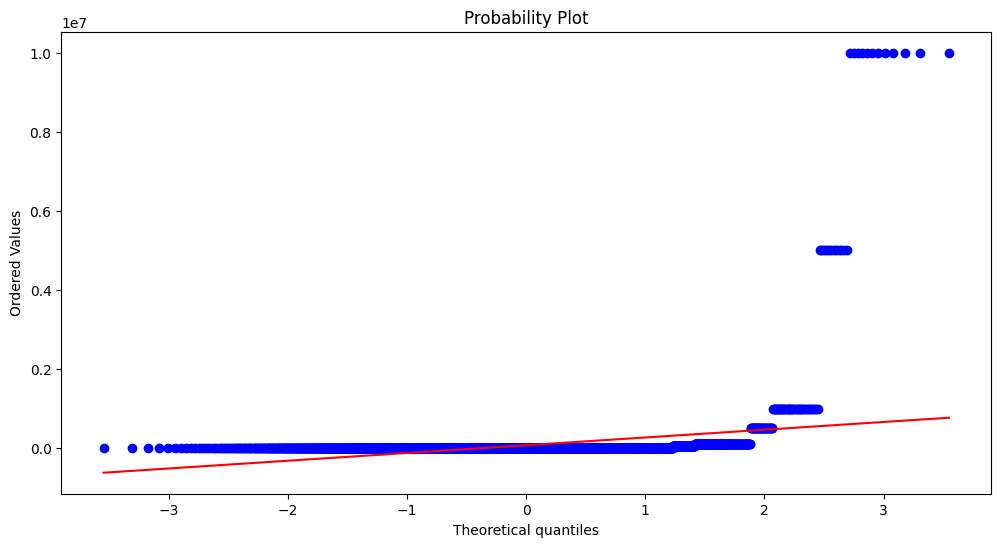

In [ ]:
#creating q-q plot
plt.figure(figsize=(12,6))
stats.probplot(df_sel['installs'],dist='norm',plot=plt)
plt.show()

<Axes: >

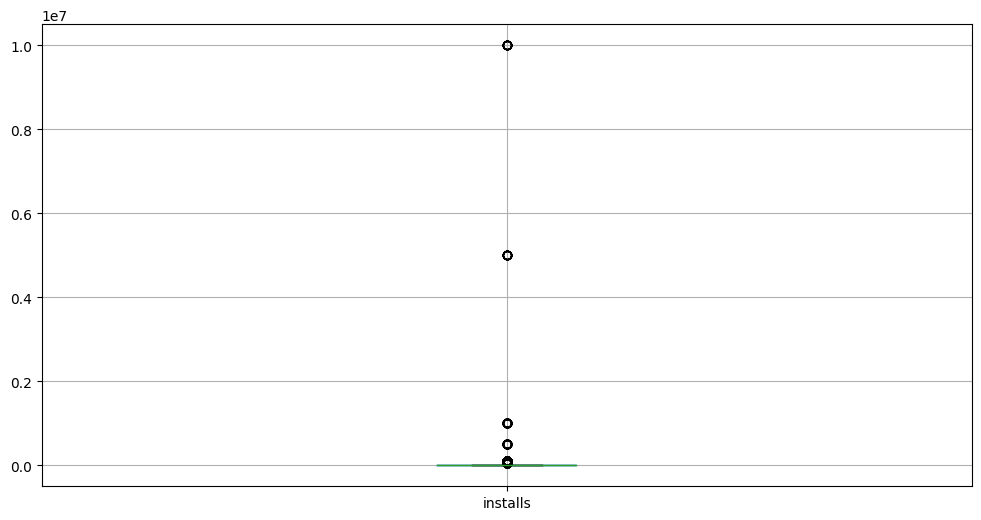

In [ ]:
#create box plot of installs
plt.figure(figsize=(12,6))
df_sel.boxplot(column=['installs'])
#setting limit to view more
#plt.ylim(0, 10000)



<Axes: >

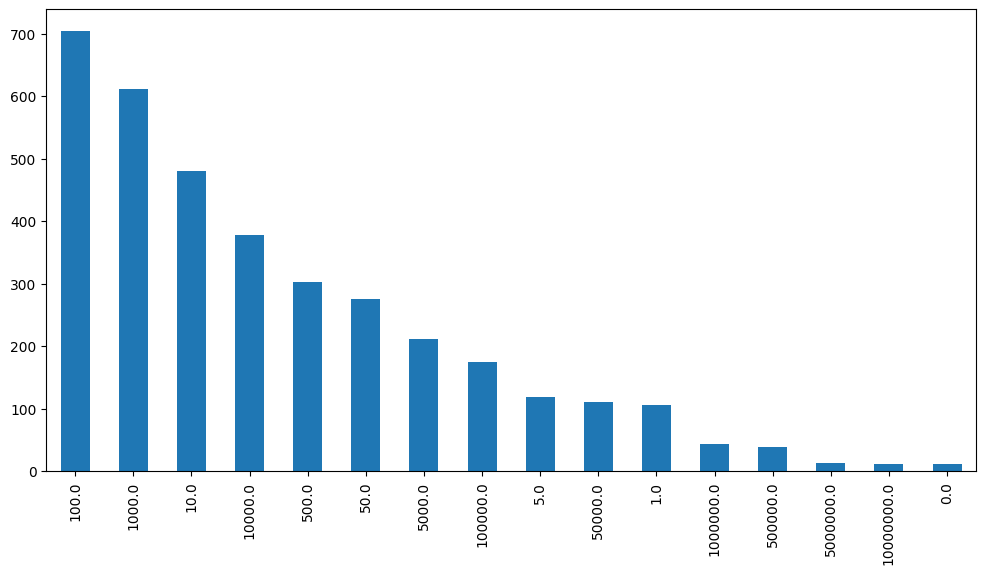

In [ ]:
#bar plot of installs
plt.figure(figsize=(12,6))
df_sel['installs'].value_counts().plot(kind='bar')

<Axes: >

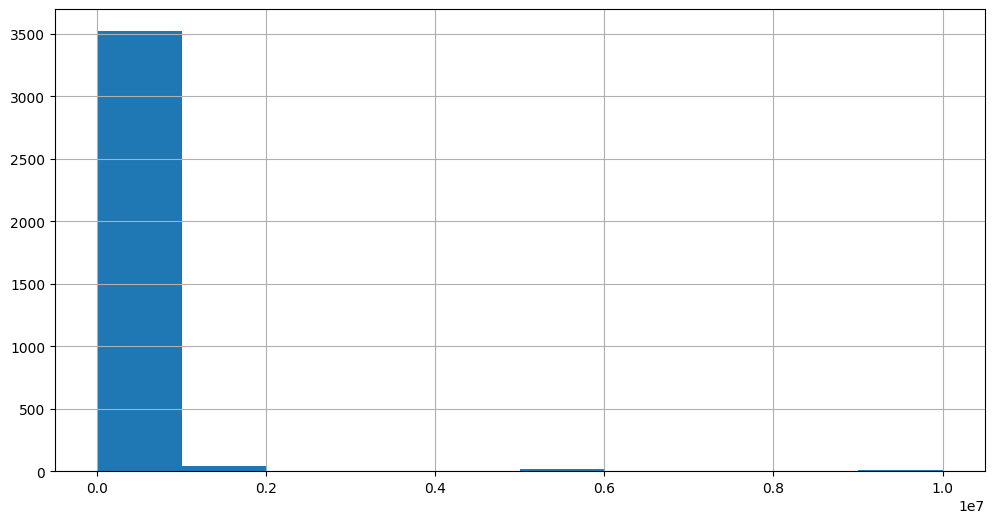

In [ ]:
#histogtram of installs
plt.figure(figsize=(12,6))
df_sel['installs'].hist()

In [ ]:
#calculate mean of each column
df_sel.mean().astype('int64')

ad_supported               0
editors_choice             0
in_app_purchases           0
installs              132669
price                      0
rating                     2
rating_count            1701
size                19307866
dtype: int64

In [ ]:
#calculate variance of each column
df_sel.var().astype('int64')

ad_supported                      0
editors_choice                    0
in_app_purchases                  0
installs              5990347238975
price                             3
rating                            4
rating_count              866627500
size                572686269230596
dtype: int64

The standard deviation is the square root of the variance. The variance is the average of the squared differences from the mean.
The standard deviation is used to measure the spread of the data.
The standard deviation measures how far the data points are spread out from the mean.
The standard deviation is widely used in statistics, data science, and machine learning.

In [ ]:
#checking standard deviation of each column
df_sel.std()

ad_supported                           0.499864
editors_choice                          0.02359
in_app_purchases                        0.26545
installs                         2447518.588076
last_updated        559 days 16:40:32.588525032
price                                  1.949123
rating                                  2.09908
rating_count                       29438.537683
released            750 days 23:42:22.680379424
size                            23930864.364469
dtype: object

In [ ]:
#standard deviation of installs
df_sel['installs'].std()
#interpret the result
#the higher the standard deviation, the higher the number of outliers


2447518.588075623

# Data Visualization

---





In [ ]:
df_sel.isnull().sum().sum()

0

**Corelation Matrix**

In [ ]:
df_sel.describe()

,installs,price,rating,rating_count,size
count,3.593000e+03,3593.000000,3593.000000,3.593000e+03,3.593000e+03
mean,1.326698e+05,0.111336,2.144285,1.701534e+03,1.930787e+07
std,2.447519e+06,1.949123,2.099080,2.943854e+04,2.393086e+07
min,0.000000e+00,0.000000,0.000000,0.000000e+00,1.843200e+04
25%,5.000000e+01,0.000000,0.000000,0.000000e+00,5.138022e+06
50%,5.000000e+02,0.000000,2.600000,6.000000e+00,1.048576e+07
75%,5.000000e+03,0.000000,4.300000,4.100000e+01,2.516582e+07
max,1.000000e+08,99.990000,5.000000,1.264773e+06,5.567939e+08


<Axes: >

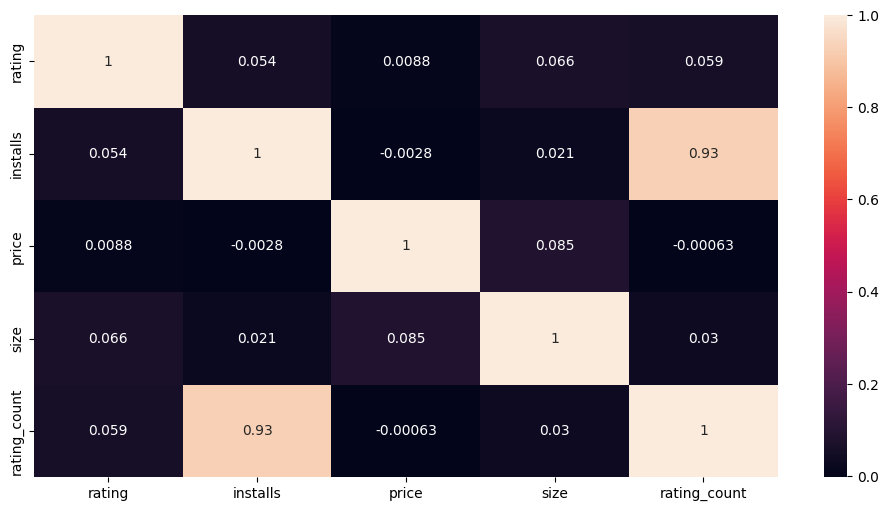

In [ ]:
plt.figure(figsize=(12,6))
num_col=['rating','installs','price','size','rating_count']
sns.heatmap(df_sel[num_col].corr(), annot=True)

**Only good correlation is of Installs Vs Rating, that makes sense as well.
Correlation matrix in pandas**


In [ ]:
df_sel[num_col].corr()

,rating,installs,price,size,rating_count
rating,1.000000,0.053692,0.008782,0.066390,0.058522
installs,0.053692,1.000000,-0.002777,0.021388,0.928010
price,0.008782,-0.002777,1.000000,0.084965,-0.000633
size,0.066390,0.021388,0.084965,1.000000,0.030315
rating_count,0.058522,0.928010,-0.000633,0.030315,1.000000


Pearsons R shows strength in linear relationship.

In [ ]:
df_clean=df_sel.dropna()
#,_ is used to ignore the 2nd value, which in this case is p value
pearson_r,_=stats.pearsonr(df_clean['rating_count'], df_clean['installs'])
print(f" The Pearson's R value is {pearson_r:3f}")

 The Pearson's R value is 0.928010


Groupby

In [ ]:
df_sel.groupby('installs_bin')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
installs_bin,,,,,,,,
Negligible,716.0,0.204715,0.915887,0.0,0.0,0.0,0.0,5.0
Very Low <100,980.0,1.092652,1.963331,0.0,0.0,0.0,0.0,5.0
Low <1000,914.0,2.975005,1.945778,0.0,0.0,3.9,4.5,5.0
Below Average <10k,589.0,3.767213,0.976118,0.0,3.5,4.0,4.4,5.0
Moderate <100k,285.0,3.871930,0.825636,0.0,3.5,4.1,4.4,4.9
High <1M,82.0,4.065854,0.475633,2.2,3.8,4.1,4.4,4.8
Very High <10M,25.0,4.132000,0.327516,3.1,3.9,4.2,4.4,4.6
Amazing <100M,2.0,4.400000,0.282843,4.2,4.3,4.4,4.5,4.6


In [ ]:
df_sel['installs_bin'].loc[df['rating'].isnull()].value_counts()

Negligible            13
Very Low <100          9
Low <1000              8
Below Average <10k     2
Moderate <100k         0
High <1M               0
Very High <10M         0
Amazing <100M          0
Name: installs_bin, dtype: int64

Text(2, 3.5, 'Null Values=28')

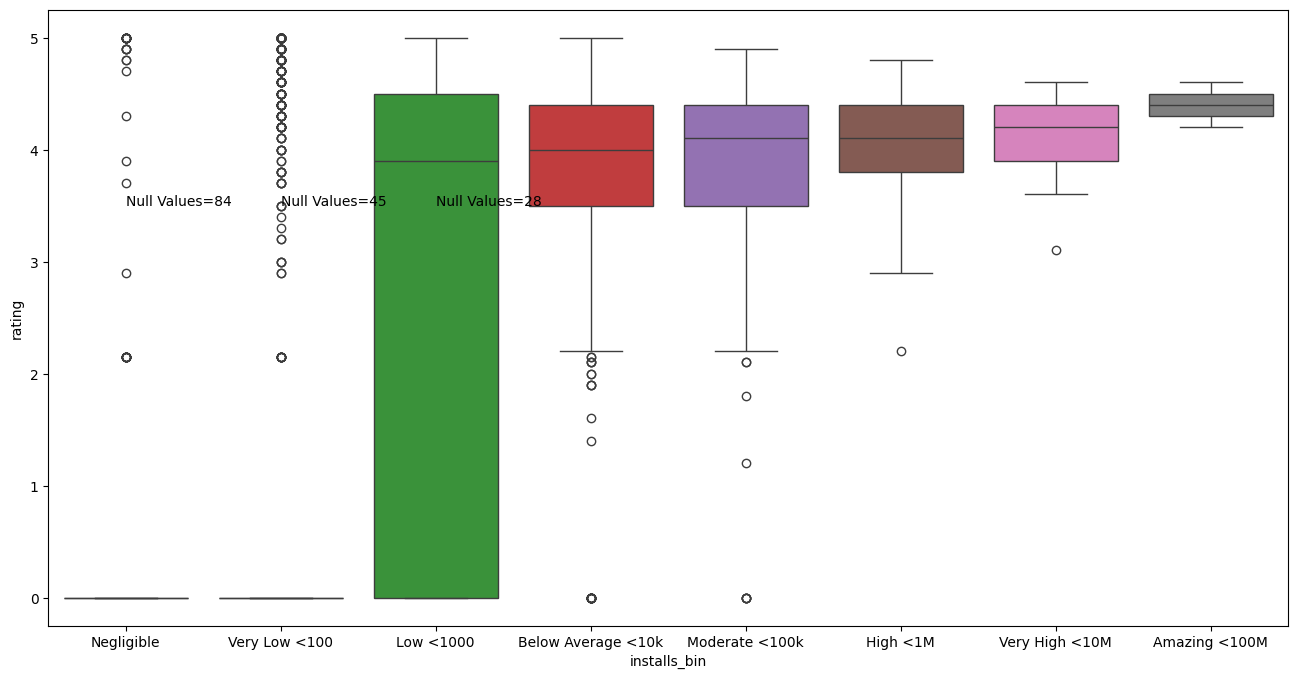

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='installs_bin',y='rating',hue='installs_bin',data=df_sel)

plt.text(0,3.5,'Null Values=84')
plt.text(1,3.5,'Null Values=45')
plt.text(2,3.5,'Null Values=28')